<a href="https://colab.research.google.com/github/Sabinghalan/Age-and-Gender-Dectection-using-OpenCV/blob/main/CNN_and_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importing the Dataset and Libraries


In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
import zipfile
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-12-26 13:51:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.207, 142.250.103.207, 142.250.159.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   219MB/s    in 2.3s    

2023-12-26 13:51:41 (219 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [24]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [25]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} filenames in '{dirpath}'.")

There are 2 directories and 0 filenames in '10_food_classes_all_data'.
There are 10 directories and 0 filenames in '10_food_classes_all_data/train'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 filenames in '10

In [26]:
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [60]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [28]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/" + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


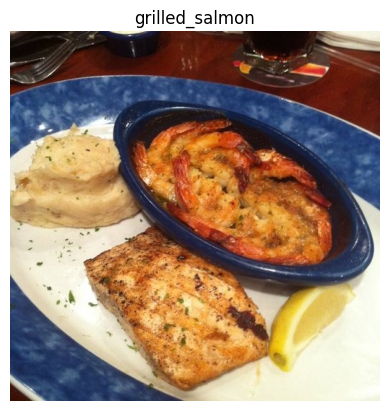

In [29]:
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

#2. Preprocessing the data.

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#3. Creating the models.

In [31]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size= 3, activation = "relu", input_shape = (224, 224, 3)), # first layer specifies input shape (height, width, colour channels
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#4. Fitting a model_1.

In [32]:
history_1 = model_1.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 34s 132ms/step - loss: 2.1365 - accuracy: 0.2089 - val_loss: 1.9918 - val_accuracy: 0.2932
Epoch 2/5
235/235 [==============================] - 30s 129ms/step - loss: 1.8690 - accuracy: 0.3575 - val_loss: 1.9028 - val_accuracy: 0.3344
Epoch 3/5
235/235 [==============================] - 31s 130ms/step - loss: 1.4523 - accuracy: 0.5179 - val_loss: 1.9669 - val_accuracy: 0.3264
Epoch 4/5
235/235 [==============================] - 34s 145ms/step - loss: 0.7055 - accuracy: 0.7716 - val_loss: 2.6836 - val_accuracy: 0.2840
Epoch 5/5
235/235 [==============================] - 32s 134ms/step - loss: 0.1922 - accuracy: 0.9465 - val_loss: 3.7251 - val_accuracy: 0.2588


In [33]:
model_1.evaluate(test_data)

79/79 [==============================] - 8s 96ms/step - loss: 3.7251 - accuracy: 0.2588


[3.725071430206299, 0.2587999999523163]

In [34]:
def plot_relationship_curves(history, model):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

 # For loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title(f"{model} Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # For accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title(f"{model} Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

In [35]:
history_1.history

{'loss': [2.136516571044922,
  1.868999719619751,
  1.4522724151611328,
  0.7055144906044006,
  0.19216321408748627],
 'accuracy': [0.20893333852291107,
  0.3574666678905487,
  0.5178666710853577,
  0.7716000080108643,
  0.9465333223342896],
 'val_loss': [1.9917505979537964,
  1.9028198719024658,
  1.9668865203857422,
  2.68363094329834,
  3.725071430206299],
 'val_accuracy': [0.29319998621940613,
  0.3343999981880188,
  0.3264000117778778,
  0.2840000092983246,
  0.2587999999523163]}

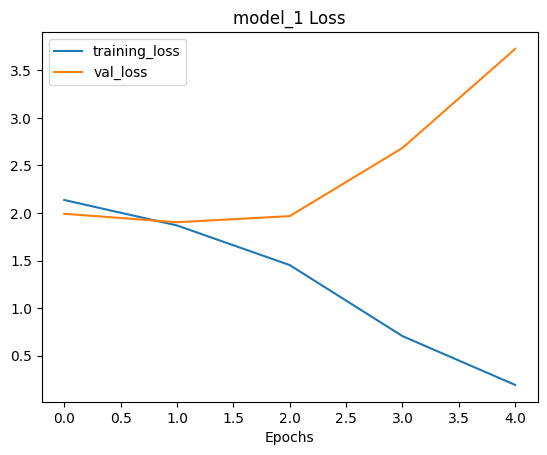

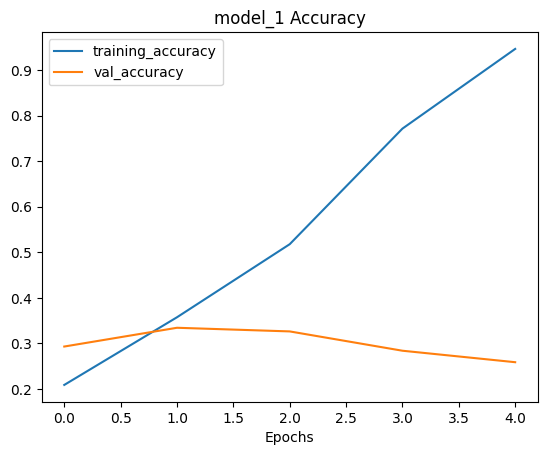

In [36]:
plot_relationship_curves(history_1, model = "model_1")

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_2 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 31s 126ms/step - loss: 2.1098 - accuracy: 0.2463 - val_loss: 1.9239 - val_accuracy: 0.3232
Epoch 2/5
235/235 [==============================] - 28s 118ms/step - loss: 1.8050 - accuracy: 0.3772 - val_loss: 2.0039 - val_accuracy: 0.3168
Epoch 3/5
235/235 [==============================] - 29s 125ms/step - loss: 1.4414 - accuracy: 0.5163 - val_loss: 1.9274 - val_accuracy: 0.3324
Epoch 4/5
235/235 [==============================] - 29s 122ms/step - loss: 0.9278 - accuracy: 0.7067 - val_loss: 2.3408 - val_accuracy: 0.3120
Epoch 5/5
235/235 [==============================] - 28s 119ms/step - loss: 0.4995 - accuracy: 0.8587 - val_loss: 2.7367 - val_accuracy: 0.2984


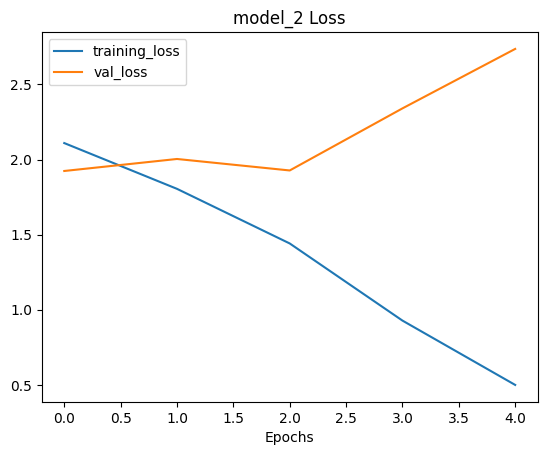

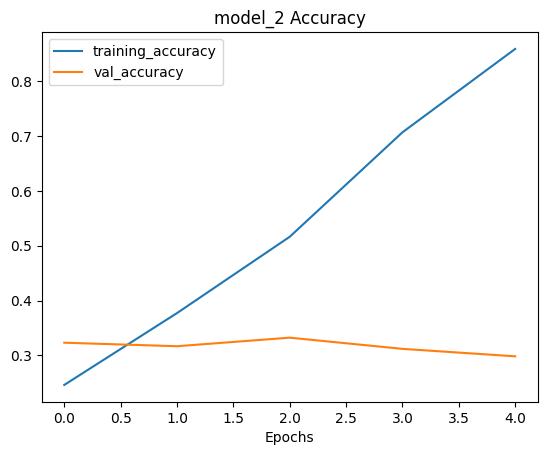

In [38]:
plot_relationship_curves(history_2, "model_2")

In [39]:
# Data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20,
                                             width_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)


train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [72]:
model_3 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])


model_3.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data_augmented,
                        epochs = 20,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))



Epoch 1/20
235/235 [==============================] - 108s 450ms/step - loss: 2.2494 - accuracy: 0.1523 - val_loss: 2.0753 - val_accuracy: 0.2144
Epoch 2/20
235/235 [==============================] - 107s 454ms/step - loss: 2.1038 - accuracy: 0.2387 - val_loss: 2.0169 - val_accuracy: 0.2908
Epoch 3/20
235/235 [==============================] - 109s 465ms/step - loss: 2.0317 - accuracy: 0.2765 - val_loss: 1.8962 - val_accuracy: 0.3316
Epoch 4/20
235/235 [==============================] - 107s 455ms/step - loss: 1.9775 - accuracy: 0.3092 - val_loss: 1.8187 - val_accuracy: 0.3732
Epoch 5/20
235/235 [==============================] - 111s 474ms/step - loss: 1.9145 - accuracy: 0.3313 - val_loss: 1.8659 - val_accuracy: 0.3448
Epoch 6/20
235/235 [==============================] - 107s 457ms/step - loss: 1.8974 - accuracy: 0.3527 - val_loss: 1.7521 - val_accuracy: 0.4064
Epoch 7/20
235/235 [==============================] - 109s 463ms/step - loss: 1.8519 - accuracy: 0.3559 - val_loss: 1.7673 -

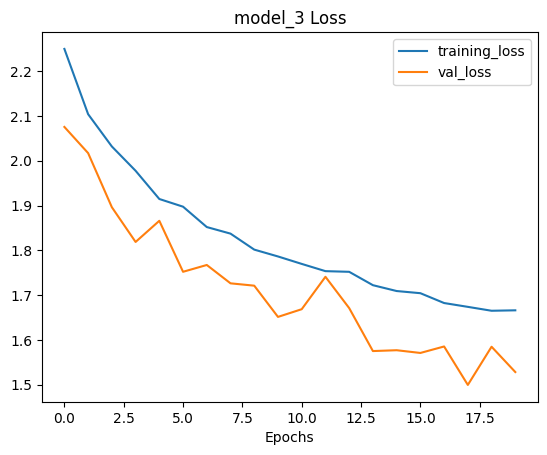

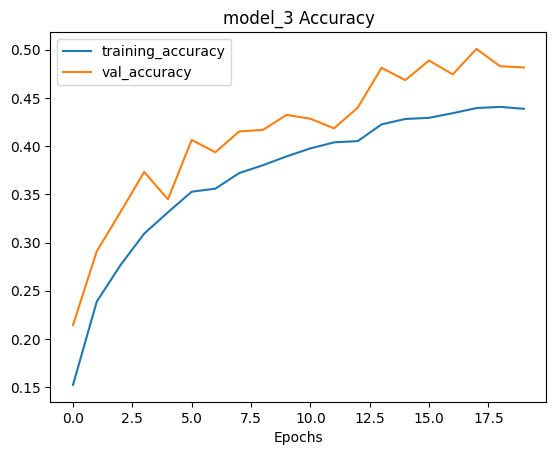

In [73]:
plot_relationship_curves(history_3, "model_3")

#4. Predicting

In [46]:
def load_and_prep_image(filename, img_shape = 224):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img


In [65]:
def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  # make prediction
  pred = model.predict(tf.expand_dims(img, axis= 0))
  # get prediction
  #pred_class = class_names[int(tf.round(pred)[0][0])]"""
  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 303ms/step


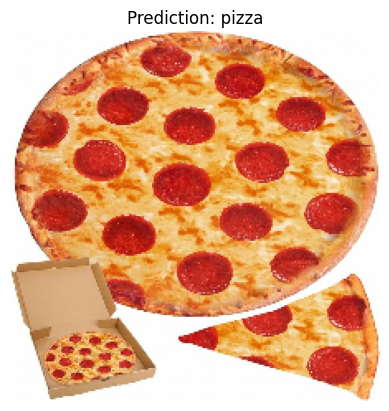

In [74]:
pred_and_plot(model_3,
              filename = "pizza.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 28ms/step


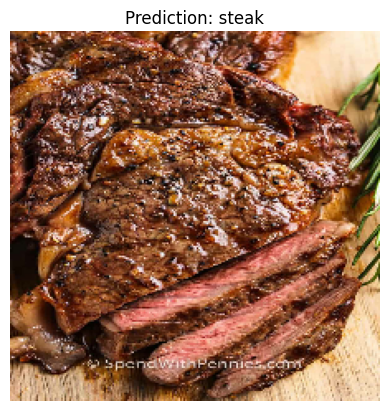

In [89]:
pred_and_plot(model_3,
              filename = "steak.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 22ms/step


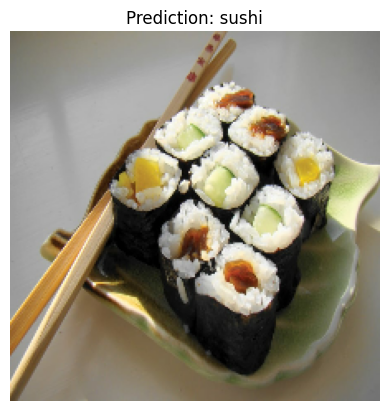

In [87]:
pred_and_plot(model_3,
              filename = "susi.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 18ms/step


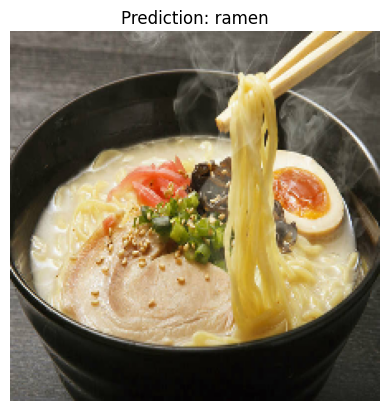

In [92]:
pred_and_plot(model_3,
              filename = "ramen.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 17ms/step


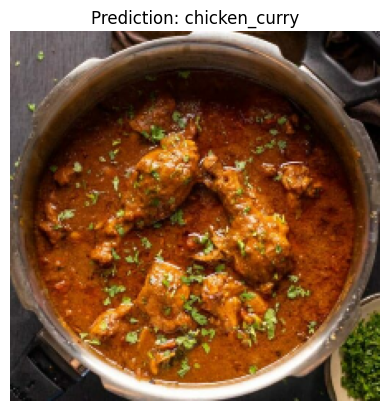

In [93]:
pred_and_plot(model_3,
              filename = "chicken_curry.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 18ms/step


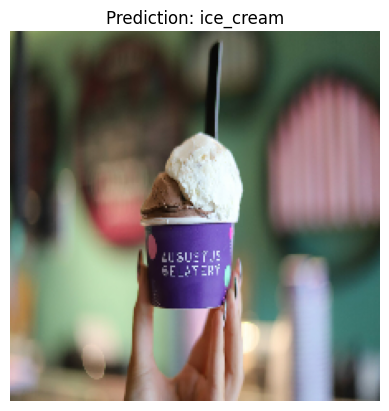

In [97]:
pred_and_plot(model_3,
              filename = "ice_cream.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 26ms/step


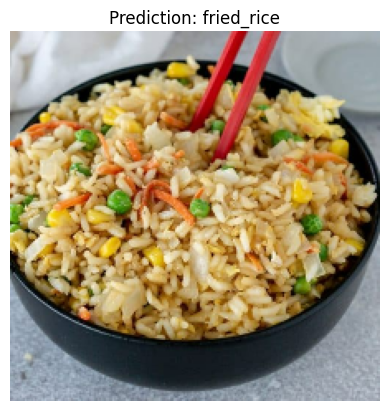

In [100]:
pred_and_plot(model_3,
              filename = "fried_rice.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 19ms/step


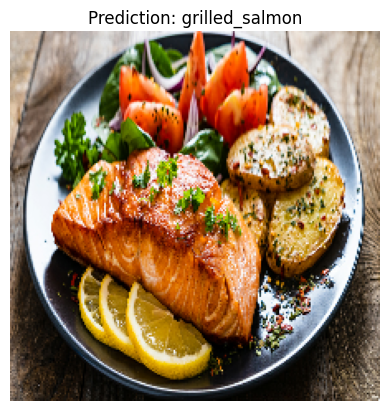

In [102]:
pred_and_plot(model_3,
              filename = "grilled_salmon.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 20ms/step


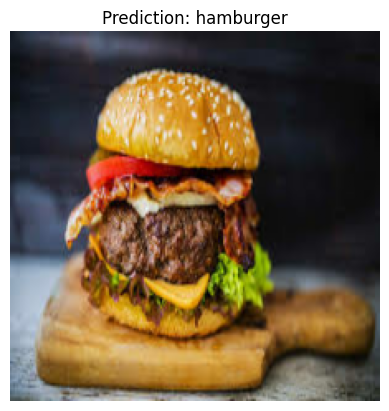

In [104]:
pred_and_plot(model_3,
              filename = "ham_burger.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 18ms/step


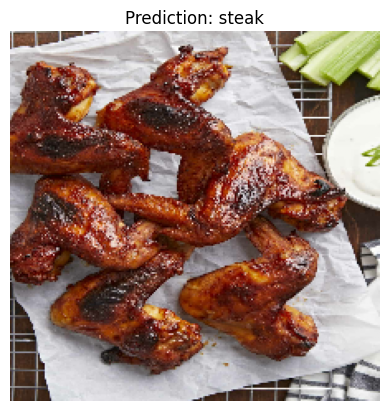

In [117]:
pred_and_plot(model_3,
              filename = "chicken_wings.jpg",
              class_names = class_names)

In [ ]:
_